In [1]:
import pandas as pd
import tsplib95
import random 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from docplex.mp.model import Model

In [2]:
sys.version

'3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]'

In [3]:
def TSP(nodes, arcos):
    mdl = Model('TSP')
    x = mdl.binary_var_dict(arcos, name = 'x')
    d = mdl.continuous_var_dict(nodes, name = 'd')

    mdl.minimize(mdl.sum(distancia[grupo][i] * x[i] for i in arcos))

    for node in nodes:
        mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if i == node)==1,ctname= 'out_%d'%node)
        
    for node in nodes:
        mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if j == node)==1,ctname= 'in_%d'%node)

    for i,j in arcos:
        if j !=nodes[0]:
            mdl.add_indicator(x[(i,j)],d[i]+1==d[j],name='order_(%d, %d)'%(i,j))
    mdl.parameters.timelimit=20
    solucion = mdl.solve(log_output= True)
    mdl.get_solve_status()
    result = solucion.get_objective_value()
    return(result)

In [4]:
problem = tsplib95.load('Data/ts225.tsp')
graph = problem.get_graph()
print(problem.render())

NAME: ts225
COMMENT: 225-city problem (Juenger,Raecke,Tschoecke)
TYPE: TSP
DIMENSION: 225
EDGE_WEIGHT_TYPE: EUC_2D
NODE_COORD_SECTION:
1 4000 4000
2 4000 4500
3 4000 5000
4 4000 5500
5 4000 6000
6 4000 6500
7 4000 7000
8 4000 7500
9 4000 8000
10 4000 8500
11 4000 9000
12 4000 9500
13 4000 10000
14 4000 10500
15 4000 11000
16 4000 11500
17 4000 12000
18 4000 12500
19 4000 13000
20 4000 13500
21 4000 14000
22 4000 14500
23 4000 15000
24 4000 15500
25 4000 16000
26 7000 4000
27 7000 4500
28 7000 5000
29 7000 5500
30 7000 6000
31 7000 6500
32 7000 7000
33 7000 7500
34 7000 8000
35 7000 8500
36 7000 9000
37 7000 9500
38 7000 10000
39 7000 10500
40 7000 11000
41 7000 11500
42 7000 12000
43 7000 12500
44 7000 13000
45 7000 13500
46 7000 14000
47 7000 14500
48 7000 15000
49 7000 15500
50 7000 16000
51 10000 4000
52 10000 4500
53 10000 5000
54 10000 5500
55 10000 6000
56 10000 6500
57 10000 7000
58 10000 7500
59 10000 8000
60 10000 8500
61 10000 9000
62 10000 9500
63 10000 10000
64 10000 10500


In [5]:
random.seed(a=1, version=2)
problem = tsplib95.load('Data/ts225.tsp')
graph = problem.get_graph()
cities = len(problem.node_coords)
city_list = [i for i in range(1,cities+1)]
cost_matrix = pd.DataFrame([])
for i in range(1,len(city_list)+1):
    cost_matrix[i] = 0
cost_matrix = cost_matrix.transpose()
for i in range(1,len(city_list)+1):
    cost_matrix[i] = 0

for i in range(1,len(city_list)+1):
    for j in range(1,len(city_list)+1):
        if i == j:
            cost_matrix[i][j] = 999999999
        else:
            cost_matrix[i][j] = problem.get_weight(i,j)

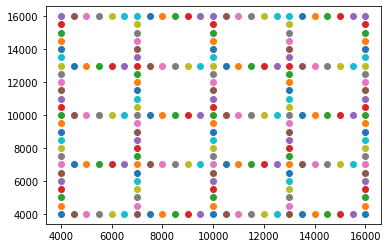

In [6]:
for i in problem.node_coords:
    plt.scatter(problem.node_coords[i][0],problem.node_coords[i][1])


In [7]:
data = []
for i in problem.node_coords:
    data.append(problem.node_coords[i])


In [8]:
data = np.array(data)

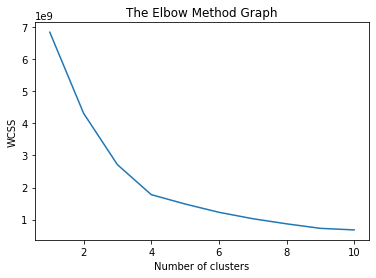

In [9]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

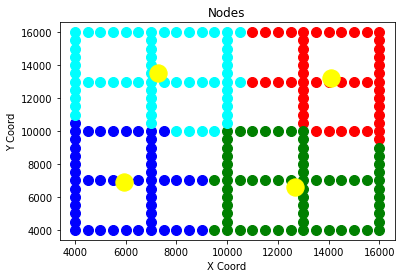

In [11]:
plt.scatter(data[kmeans.labels_==0, 0], data[kmeans.labels_==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data[kmeans.labels_==1, 0], data[kmeans.labels_==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data[kmeans.labels_==2, 0], data[kmeans.labels_==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(data[kmeans.labels_==3, 0], data[kmeans.labels_==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(data[kmeans.labels_==4, 0], data[kmeans.labels_==4, 1], s=100, c='black', label ='Cluster 5')
plt.scatter(data[kmeans.labels_==5, 0], data[kmeans.labels_==5, 1], s=100, c='magenta', label ='Cluster 6')
plt.scatter(data[kmeans.labels_==6, 0], data[kmeans.labels_==6, 1], s=100, c='silver', label ='Cluster 7')
plt.scatter(data[kmeans.labels_==7, 0], data[kmeans.labels_==7, 1], s=100, c='purple', label ='Cluster 8')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Nodes')
plt.xlabel('X Coord')
plt.ylabel('Y Coord')
plt.show()

In [12]:
citygroups = problem.node_coords.copy()
for i in range(len(problem.node_coords)):
    citygroups[i+1].append(kmeans.labels_[i])
citygroups
city = pd.DataFrame([])

In [13]:
city = pd.DataFrame(citygroups)
city = city.transpose()
city = city.rename_axis(index = 'City')
city.columns = ['X Coord', 'Y Coord', 'Group']

## Objective Function Indicator Constraint

## $Min \; Z= \; \displaystyle\sum_{i=1}^n\sum_{j=1,j\neq i}^n d_{ij}  x_{ij} $
 $Subject \;to:$
 
 $\displaystyle\sum_{j=1, j\neq i}^n x_{ij} = 1, \; \forall \;i \in N$ 
 
 $\displaystyle\sum_{i=1, i\neq j}^n x_{ij} = 1, \; \forall \;j \in N$


In [14]:
distancia = {}
for grupo in city['Group'].unique():
    arcos = []
    distancia[grupo] = {}
    for i in list(city[city['Group']==grupo].index):
        for j in list(city[city['Group']==grupo].index):
            if i != j:
                arcos.append((i,j))
    for k in arcos:
        distancia[grupo][k] = problem.get_weight(*k)

In [15]:
dist = 0
for grupo in city['Group'].unique():
    arcos = list(distancia[grupo].keys())
    nodes = list(city[city['Group']==grupo].index)  
    dist += TSP(nodes, arcos)

columns.
Reduced MIP has 784 rows, 2097 columns, and 4774 nonzeros.
Reduced MIP has 1364 binaries, 0 generals, 0 SOSs, and 1351 indicators.
Presolve time = 0.02 sec. (2.71 ticks)
Tried aggregator 1 time.
Reduced MIP has 784 rows, 2097 columns, and 4774 nonzeros.
Reduced MIP has 1364 binaries, 0 generals, 0 SOSs, and 1351 indicators.
Presolve time = 0.00 sec. (3.55 ticks)
Represolve time = 0.06 sec. (26.02 ticks)

Repeating presolve.
Tried aggregator 1 time.
MIP Presolve eliminated 20 rows and 60 columns.
Reduced MIP has 764 rows, 2037 columns, and 4634 nonzeros.
Reduced MIP has 1324 binaries, 0 generals, 0 SOSs, and 1311 indicators.
Presolve time = 0.02 sec. (2.32 ticks)
Tried aggregator 1 time.
Reduced MIP has 764 rows, 2037 columns, and 4634 nonzeros.
Reduced MIP has 1324 binaries, 0 generals, 0 SOSs, and 1311 indicators.
Presolve time = 0.00 sec. (3.47 ticks)
Represolve time = 0.05 sec. (24.36 ticks)
  82645     0    28242.0000    50    30737.0000       Cuts: 3   351764    6.21%
  8

In [16]:
dist

133750.99999999985

In [18]:
grupo = 0
arcos = list(distancia[grupo].keys())
nodes = list(city[city['Group']==grupo].index)
mdl = Model('TSP')
x = mdl.binary_var_dict(arcos, name = 'x')
d = mdl.continuous_var_dict(nodes, name = 'd')

mdl.minimize(mdl.sum(distancia[grupo][i] * x[i] for i in arcos))

for node in nodes:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if i == node)==1,ctname= 'out_%d'%node)
    
for node in nodes:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if j == node)==1,ctname= 'in_%d'%node)

for i,j in arcos:
    if j !=nodes[0]:
        mdl.add_indicator(x[(i,j)],d[i]+1==d[j],name='order_(%d, %d)'%(i,j))
mdl.parameters.timelimit=20
solucion = mdl.solve(log_output= True)

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
CPXPARAM_TimeLimit                               20
Tried aggregator 2 times.
MIP Presolve modified 496 coefficients.
Aggregator did 496 substitutions.
Reduced MIP has 594 rows, 1617 columns, and 3696 nonzeros.
Reduced MIP has 1056 binaries, 0 generals, 0 SOSs, and 1024 indicators.
Presolve time = 0.00 sec. (4.63 ticks)
Found incumbent of value 81100.000000 after 0.01 sec. (12.54 ticks)
Probing time = 0.00 sec. (3.23 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 594 rows, 1617 columns, and 3696 nonzeros.
Reduced MIP has 1056 binaries, 0 generals, 0 SOSs, and 1024 indicators.
Presolve time = 0.02 sec. (2.69 ticks)
Probing time = 0.00 sec. (2.58 ticks)
Clique table members: 562.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using u

In [19]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [17]:
city['Group'].unique()

array([1, 6, 4, 7, 2, 3, 5, 0], dtype=int64)

Help on SolveSolution in module docplex.mp.solution object:

class SolveSolution(builtins.object)
 |  SolveSolution(model, var_value_map=None, obj=None, blended_obj_by_priority=None, name=None, solved_by=None, keep_zeros=True)
 |  
 |  The :class:`SolveSolution` class holds the result of a solve.
 |  
 |  Methods defined here:
 |  
 |  __as_df__(self, name_key='name', value_key='value')
 |  
 |  __contains__(self, dvar)
 |  
 |  __getitem__(self, arg)
 |  
 |  __init__(self, model, var_value_map=None, obj=None, blended_obj_by_priority=None, name=None, solved_by=None, keep_zeros=True)
 |      SolveSolution(model, var_value_map, obj, name)
 |      
 |      Creates a new solution object, associated to a a model.
 |      
 |      Args:
 |          model: The model to which the solution is associated. This model cannot be changed.
 |      
 |          obj: The value of the objective in the solution. A value of None means the objective is not defined at the
 |              time the solution 

In [27]:
mdl.solution.get_value()

docplex.mp.SolveDetails(time=0.484,status='integer optimal solution')

In [32]:
print(mdl.statistics)

 - number of variables: 1089
   - binary=1056, integer=0, continuous=33
 - number of constraints: 1090
   - linear=66, indicator=1024


In [42]:
mdl.solve_details

TypeError: get_value() missing 1 required positional argument: 'arg'

In [ ]:
help(solucion)

In [61]:
solucion.display()

solution for: TSP
objective: 19582
x_93_195 = 1
x_94_93 = 1
x_95_96 = 1
x_96_97 = 1
x_97_98 = 1
x_98_99 = 1
x_99_196 = 1
x_100_221 = 1
x_118_220 = 1
x_119_118 = 1
x_120_119 = 1
x_121_120 = 1
x_122_121 = 1
x_123_122 = 1
x_124_123 = 1
x_125_124 = 1
x_194_95 = 1
x_195_194 = 1
x_196_197 = 1
x_197_198 = 1
x_198_199 = 1
x_199_200 = 1
x_200_100 = 1
x_216_94 = 1
x_217_216 = 1
x_218_217 = 1
x_219_218 = 1
x_220_219 = 1
x_221_222 = 1
x_222_223 = 1
x_223_224 = 1
x_224_225 = 1
x_225_125 = 1
d_94 = 32.000
d_95 = 3.000
d_96 = 4.000
d_97 = 5.000
d_98 = 6.000
d_99 = 7.000
d_100 = 13.000
d_118 = 26.000
d_119 = 25.000
d_120 = 24.000
d_121 = 23.000
d_122 = 22.000
d_123 = 21.000
d_124 = 20.000
d_125 = 19.000
d_194 = 2.000
d_195 = 1.000
d_196 = 8.000
d_197 = 9.000
d_198 = 10.000
d_199 = 11.000
d_200 = 12.000
d_216 = 31.000
d_217 = 30.000
d_218 = 29.000
d_219 = 28.000
d_220 = 27.000
d_221 = 14.000
d_222 = 15.000
d_223 = 16.000
d_224 = 17.000
d_225 = 18.000


In [65]:
solucion.as_dict()

{docplex.mp.Var(type=B,name='x_93_195'): 1.0,
 docplex.mp.Var(type=B,name='x_94_93'): 1.0,
 docplex.mp.Var(type=B,name='x_95_96'): 1.0,
 docplex.mp.Var(type=B,name='x_96_97'): 1.0,
 docplex.mp.Var(type=B,name='x_97_98'): 1.0,
 docplex.mp.Var(type=B,name='x_98_99'): 1.0,
 docplex.mp.Var(type=B,name='x_99_196'): 1.0,
 docplex.mp.Var(type=B,name='x_100_221'): 1.0,
 docplex.mp.Var(type=B,name='x_118_220'): 1.0,
 docplex.mp.Var(type=B,name='x_119_118'): 1.0,
 docplex.mp.Var(type=B,name='x_120_119'): 1.0,
 docplex.mp.Var(type=B,name='x_121_120'): 1.0,
 docplex.mp.Var(type=B,name='x_122_121'): 1.0,
 docplex.mp.Var(type=B,name='x_123_122'): 1.0,
 docplex.mp.Var(type=B,name='x_124_123'): 1.0,
 docplex.mp.Var(type=B,name='x_125_124'): 1.0,
 docplex.mp.Var(type=B,name='x_194_95'): 1.0,
 docplex.mp.Var(type=B,name='x_195_194'): 1.0,
 docplex.mp.Var(type=B,name='x_196_197'): 1.0,
 docplex.mp.Var(type=B,name='x_197_198'): 1.0,
 docplex.mp.Var(type=B,name='x_198_199'): 1.0,
 docplex.mp.Var(type=B,nam

In [93]:
solucion.as_df()

,name,value
0,x_93_195,1.0
1,x_94_93,1.0
2,x_95_96,1.0
3,x_96_97,1.0
4,x_97_98,1.0
...,...,...
60,d_221,14.0
61,d_222,15.0
62,d_223,16.0
63,d_224,17.0


In [66]:
solucion.as_name_dict()

{'x_93_195': 1.0,
 'x_94_93': 1.0,
 'x_95_96': 1.0,
 'x_96_97': 1.0,
 'x_97_98': 1.0,
 'x_98_99': 1.0,
 'x_99_196': 1.0,
 'x_100_221': 1.0,
 'x_118_220': 1.0,
 'x_119_118': 1.0,
 'x_120_119': 1.0,
 'x_121_120': 1.0,
 'x_122_121': 1.0,
 'x_123_122': 1.0,
 'x_124_123': 1.0,
 'x_125_124': 1.0,
 'x_194_95': 1.0,
 'x_195_194': 1.0,
 'x_196_197': 1.0,
 'x_197_198': 1.0,
 'x_198_199': 1.0,
 'x_199_200': 1.0,
 'x_200_100': 1.0,
 'x_216_94': 1.0,
 'x_217_216': 1.0,
 'x_218_217': 1.0,
 'x_219_218': 1.0,
 'x_220_219': 1.0,
 'x_221_222': 1.0,
 'x_222_223': 1.0,
 'x_223_224': 1.0,
 'x_224_225': 1.0,
 'x_225_125': 1.0,
 'd_94': 32.0,
 'd_95': 3.0,
 'd_96': 4.0,
 'd_97': 5.0,
 'd_98': 6.0,
 'd_99': 7.0,
 'd_100': 13.0,
 'd_118': 26.0,
 'd_119': 25.0,
 'd_120': 24.0,
 'd_121': 23.0,
 'd_122': 22.0,
 'd_123': 21.0,
 'd_124': 20.0,
 'd_125': 19.0,
 'd_194': 2.0,
 'd_195': 1.0,
 'd_196': 8.0,
 'd_197': 9.0,
 'd_198': 10.0,
 'd_199': 11.0,
 'd_200': 12.0,
 'd_216': 31.0,
 'd_217': 30.0,
 'd_218': 29.0,
 '

In [77]:
mdl.print_solution()

objective: 19582
  x_93_195=1
  x_94_93=1
  x_95_96=1
  x_96_97=1
  x_97_98=1
  x_98_99=1
  x_99_196=1
  x_100_221=1
  x_118_220=1
  x_119_118=1
  x_120_119=1
  x_121_120=1
  x_122_121=1
  x_123_122=1
  x_124_123=1
  x_125_124=1
  x_194_95=1
  x_195_194=1
  x_196_197=1
  x_197_198=1
  x_198_199=1
  x_199_200=1
  x_200_100=1
  x_216_94=1
  x_217_216=1
  x_218_217=1
  x_219_218=1
  x_220_219=1
  x_221_222=1
  x_222_223=1
  x_223_224=1
  x_224_225=1
  x_225_125=1
  d_94=32.000
  d_95=3.000
  d_96=4.000
  d_97=5.000
  d_98=6.000
  d_99=7.000
  d_100=13.000
  d_118=26.000
  d_119=25.000
  d_120=24.000
  d_121=23.000
  d_122=22.000
  d_123=21.000
  d_124=20.000
  d_125=19.000
  d_194=2.000
  d_195=1.000
  d_196=8.000
  d_197=9.000
  d_198=10.000
  d_199=11.000
  d_200=12.000
  d_216=31.000
  d_217=30.000
  d_218=29.000
  d_219=28.000
  d_220=27.000
  d_221=14.000
  d_222=15.000
  d_223=16.000
  d_224=17.000
  d_225=18.000


In [79]:
mdl.report()

* model TSP solved with objective = 19582.000


In [103]:
solucion.get_objective_value()

19582.0